## Income Classification Problem 

In [38]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings("ignore")


%matplotlib inline

## Data Description and Definition

In [2]:
df = pd.read_csv("C:/Users/nikhi/income_classifier/dataset/salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Understanding the Basic Structure of the Data

In [3]:
df.shape

(32561, 15)

> There are 15 Features and 32561 datapoints 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


## Summary of the data spread in case of the Numerical Features 

In [ ]:
df.describe().T

In [ ]:
df.salary.value_counts()

__Dependent Variable need to be transfomered in order to improve the accuracy of the model__

In [5]:
df_salary = pd.get_dummies(df['salary'], drop_first=True)
df_salary

,>50K
0,0
1,0
2,0
3,0
4,0
...,...
32556,0
32557,1
32558,0
32559,0


In [6]:
df = df.drop('salary', axis=1)
df['salary'] = df_salary
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Correlation Report 

__Here we are computing the pairwise correlation value for all the columns__

In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

Insights: 

    - "fnlwgt" is negatively correlated with all the other features which indicates it has no use.
    
    -  We are seeing Positive Correlation between the salary and ['Age','education-num','hours-per-week']

In [8]:
cat_columns = [col for col in df.columns if df[col].dtype == 'O']
num_columns = [col for col in df.columns if col not in cat_columns]

In [9]:
for col in cat_columns:
    df[col] = df[col].apply(lambda x: x.strip())
    if df[col].nunique() > 1:
        print(f"Unique Values for {col} are: {df[col].unique()}  \n")
    else:
        pass


Unique Values for workclass are: ['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']  

Unique Values for education are: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']  

Unique Values for marital-status are: ['Never-married' 'Married-civ-spouse' 'Divorced' 'Married-spouse-absent'
 'Separated' 'Married-AF-spouse' 'Widowed']  

Unique Values for occupation are: ['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']  

Unique Values for relationship are: ['Not-in-family' 'Husband' 'Wife' 'Own-child' 'Unmarried' 'Other-relative']  

Unique Values for race are: ['White' 'Black' 'Asian-Pac-Islander' 'Amer-Indian-Eskimo' '

In [10]:
df.replace({'?': np.NAN}, inplace=True)
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [11]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

## Null Value Analysis 

_Based on the analysis, the missing values are treated; Missing Values bring no information to the model, Discard them or Impute them based the missing values ratio_

__Output: ['workclass','occupation', 'native-county']__ Missing Values found were negligible. Therefore we can drop them. Alternatively since these features are categorical in nature we can simply use mode imputation and remove the null values.


<AxesSubplot:>

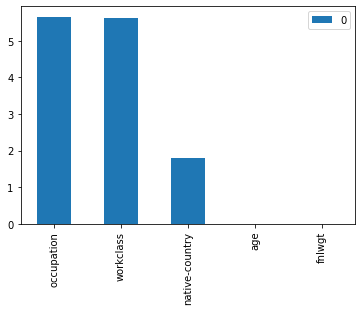

In [12]:
missing_info = df.isna().sum().div(df.shape[0]).mul(100).to_frame().sort_values(by=0,ascending=False)

missing_info.head(5).plot(kind='bar')

In [13]:
final_df = df.dropna()
final_df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [14]:
final_df.shape

(30162, 15)

_The ratio of the missing values in the dataset is negligible. Therefore we can drop these, Though we need a function for this process for checking other conditions and treating the missing values accordingly._

## Exploratory Data Analysis 

In [ ]:
sns.pairplot(df)

## Univariant Analysis 

In [ ]:
df['age'].hist(figsize=(12,6))
plt.show()

Insigths - _Here the age demographics in spread between the ages 17 - 90. Also the data looks slightly right skewed._

In [ ]:
df['capital-gain'].hist(figsize=(5,5))
plt.show()

In [ ]:
df['capital-loss'].hist(figsize=(5,5))
plt.show()

> Insigths - In both the plots it is clear that most of the values are centered around 0. It also suggests that both capital_loss and capital gain are zeros in majority of the cases.

In [ ]:
df['education-num'].hist(figsize=(6,6))

_The datapoints for Number of years of education varies between 1-16, where mojority of the individuals have 9-11 years of education._

_This data follows the trend in case of this feature._

In [ ]:
df['hours-per-week'].hist(figsize=(12,6))
plt.xlabel('hours per week')

_Conclusion_: The values range between 1-99hrs. Majority of the people spend 25-40 hrs per week working. Whereas, there is also evidence that shows people with 20 hours a week which is pretty unusual.

In [ ]:
plt.figure(figsize=(12,5))

total = float(len(df['salary']))

a = sns.countplot(x='workclass',data=df, palette='icefire')

for f in a.patches:
    height = f.get_height()
    a.text(f.get_x() + f.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100),ha="center")
plt.show()

<i>Almost 70% of the working class belongs to the private sector, given the better salary and premium incentives</i>

In [ ]:
plt.figure(figsize=(20,5))

a= float(len(['income']))

a= sns.countplot(x='education',data=df, palette='icefire')
for s in a.patches:
    height = s.get_height()
    a.text(s.get_x()+s.get_width()/2.,height+3,'{:1.2f}'.format((height/total)*100),ha='center')
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="marital-status", data=df, palette='icefire')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [ ]:
plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="occupation", data=df, palette='icefire')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

<h3><i>The dataset is almost evenly distributed in terms of occupation, although Armed-forces has the lowest distribution among all the features</i></h3>

In [ ]:
sns.set(style="darkgrid")
sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="relationship", data=df, palette='icefire')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [ ]:
sns.set(style="darkgrid")
sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="race", data=df, palette='icefire')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [ ]:
sns.set(style="darkgrid")
sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="sex", data=df, palette='icefire')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

In [ ]:
sns.set(style="darkgrid")
sns.color_palette("mako", as_cmap=True)

plt.figure(figsize=(15,8))
total = float(len(df) )

ax = sns.countplot(x="salary", data=df, palette='icefire')
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format((height/total)*100),
            ha="center") 
plt.show()

_From above the plot it is clear that the dataset is imbalanced, Here 75% of data represent the population with income less than 50K, while only 25% of the data is indicated the income to be higher than 50K_

## Bivariant Analysis

In [ ]:
fig = plt.figure(figsize=(12,6))

sns.boxplot(x='salary', y='age', data=df, palette='icefire')
plt.title("Relationship between Age and Income")
plt.show()

<i> Insights - </i> 

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='workclass', hue='salary', data=df, palette='icefire')
plt.show()

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='relationship', hue='salary', data=df, palette='icefire')
plt.show()

In [ ]:
plt.figure(figsize=(12,5))
sns.catplot(y='race', hue='salary', kind='count', col='sex', data=df, palette='icefire')


In [ ]:
plt.figure(figsize=(12,6))
total = float(len(df))

ax = sns.countplot(x='workclass', hue='salary', data=df, palette='icefire')
for p in ax.patches:
    height = p.get_height()
    ax.text(f.get_x() + p.get_width()/2., height+3, '{:1.2f}'.format((height/total)*100), ha='center')

plt.show()

In [ ]:
sns.violinplot(data=df, x='salary', y='age', palette='icefire')
plt.title("Violin Plot for Age w.r.t Income")
blue_patch = mpatches.Patch(color='darkblue',label='<50K')
maroon_patch = mpatches.Patch(color='maroon',label='>50K')
plt.legend(handles=[blue_patch, maroon_patch], loc=1)
sns.set_palette('icefire')
plt.show()

In [ ]:
plt.figure(figsize=(12,8))
sns.catplot(y='education', hue='salary',kind='count', data=df, palette='icefire')
plt.show()

In [ ]:
sns.catplot(y='marital-status',hue='sex',col='salary',data=df,kind='count', palette='icefire')

In [ ]:
sns.countplot(y='occupation',hue='salary',data=df, palette='icefire')

In [ ]:
sns.countplot(y='relationship',hue='salary',data=df, palette='icefire')

In [ ]:
sns.catplot(y='race',data=df,col='salary', kind='count' ,palette='icefire')

In [ ]:
plt.figure(figsize=(12,10))
for i, col in enumerate(num_columns):
    plt.subplot(2,4,i+1)
    sns.distplot(x=df[col], color='blue')
    plt.xlabel(col, weight='bold')
    

plt.show()

### Dropping Columns 

In [15]:
final_df.drop(['capital-loss','capital-gain','fnlwgt'], axis=1, inplace=True)
final_df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


## Model Building


In [16]:
X = final_df.drop('salary', axis=1)
y = final_df['salary']

In [25]:
cat_cols = [col for col in X.columns if X[col].dtype == 'O']
num_cols = [col for col in X.columns if col not in cat_cols]
num_cols

['age', 'education-num', 'hours-per-week']

In [26]:
X.isnull().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
dtype: int64

In [ ]:
numerical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', RobustScaler())
])

categorical_pipeline = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
    ]
)


In [ ]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num', numerical_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ]
)

In [ ]:
X_new = preprocessor.fit_transform(X)
X_new

In [ ]:


smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_new, y) 

In [ ]:
X_res.shape

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek


In [18]:
def evaluate_clf(true, predicted):
    """
    This Funciton takes in true values and predicted values 
    Returns: Accuracy, F1 score , Precision, Recall, ROC_AUC Score
    """
    # Calculate Accuracy
    acc = accuracy_score(true, predicted) 
    # Calculate F1-score
    f1 = f1_score(true, predicted) 
    # Calculate Precision
    precision = precision_score(true, predicted) 
    # Calculate Recall
    recall = recall_score(true, predicted)  
    #Calculate Roc
    roc_auc = roc_auc_score(true, predicted) 
    return acc, f1 , precision, recall, roc_auc

In [19]:
def evaluate_models(X,y, models):
    """
    This function takes in X and y, models dictionary as input 
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: DataFrame which contains report of all models metrics with cost
    """
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)
    # cost_list = []
    models_list = []
    accuracy_list = []

    for i in range(len(list(models))):
        model = list(models.values())[i]
        model.fit(X_train,y_train)

        # Make Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1, model_train_precision, \
        model_train_recall, model_train_rocauc_score = evaluate_clf(y_train,y_train_pred)
        # train_cost = total_cost(y_train,y_train_pred)

        # Testing set performance
        model_test_accuracy, model_test_f1, model_test_precision, \
        model_test_recall, model_test_rocauc_score = evaluate_clf(y_test,y_test_pred)
        # test_cost = total_cost(y_test,y_test_pred)

        print(list(models.keys())[i])
        models_list.append(list(models.keys())[i])
        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1)) 
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        # print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        # print(f'- COST: {test_cost}.')
        # cost_list.append(test_cost)
        accuracy_list.append(model_test_accuracy)
        print('='*35)
        print('\n')
        
    report=pd.DataFrame(list(zip(models_list, accuracy_list)), columns=['Model Name', 'Accuracy']).sort_values(by=["Accuracy"])
        
    return report


In [20]:
models = {
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(),
     "K-Neighbors Classifier": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(), 
     "CatBoosting Classifier": CatBoostClassifier(verbose=False),
    "AdaBoost Classifier": AdaBoostClassifier()
}

In [ ]:
report_simple_imputer = evaluate_models(X_res, y_res, models)


In [ ]:
report_simple_imputer

## Experiment 2: Simple Imputer with Mean and Standard Scaler

In [ ]:
numerical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', StandardScaler())
])

categorical_pipeline = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
    ]
)


In [ ]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num', numerical_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ]
)

In [ ]:
X_new = preprocessor.fit_transform(X)
X_new

In [ ]:
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_new, y) 

In [ ]:
report2 = evaluate_models(X_res, y_res, models)

In [ ]:
report_simple_imputer

In [ ]:
report2

## Experiment 3

In [ ]:
numerical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', RobustScaler())
])

categorical_pipeline = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder())
    ]
)

In [ ]:
preprocessor = ColumnTransformer(
    transformers= [
        ('num', numerical_pipeline, num_cols),
        ('cat', categorical_pipeline, cat_cols)
    ]
)

In [ ]:
X_new = preprocessor.fit_transform(X)


In [ ]:
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_new, y)


In [ ]:
report3 = evaluate_models(X_res, y_res, models)


In [ ]:
report_simple_imputer

In [ ]:
report2

In [ ]:
report3

Experiment No 4 : Ordinal Encoder and label Encoder with Simple Imputer and Robust Scaler


In [34]:
from category_encoders import TargetEncoder

In [ ]:
for col in cat_cols:
    print(f'{col}:{X[col].unique()} \n')

In [21]:
workclass_cat = ['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov', 'Local-gov',
 'Self-emp-inc', 'Without-pay', 'Never-worked']

education_cat = ['Doctorate', 'Masters', 'Bachelors', 'HS-grad',  'Some-college', 'Assoc-acdm',
 'Assoc-voc',  'Prof-school', '12th', '10th', '11th', '9th', '7th-8th',  '5th-6th',
 '1st-4th', 'Preschool']

In [48]:
numerical_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', RobustScaler())
])

ordinal_cat_pipeline = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OrdinalEncoder(categories=[workclass_cat, education_cat]))
    ]
)

nominal_cat_pipeline = Pipeline(
    steps=[
        ('impute', SimpleImputer(strategy='most_frequent')),
        ('encode', OneHotEncoder(handle_unknown='ignore', sparse=False, drop='first'))
    ]
)

In [27]:
num_cols

['age', 'education-num', 'hours-per-week']

In [28]:
ordinal_cat_cols = ['workclass', 'education']
nom_cat_cols = [col for col in cat_cols if col not in ordinal_cat_cols] 

In [49]:
preprocessor = ColumnTransformer(
    transformers = [
        ('numerical', numerical_pipeline, num_cols),
        ('ordinal_enc', ordinal_cat_pipeline, ordinal_cat_cols),
        ('nominal_enc', nominal_cat_pipeline, nom_cat_cols)
    ]
)


In [50]:
X_new = preprocessor.fit_transform(X)
X_new.shape

(30162, 74)

In [51]:
smt = SMOTETomek(random_state=42, sampling_strategy='minority', n_jobs=-1)
X_res, y_res = smt.fit_resample(X_new, y)

In [52]:
report4 = evaluate_models(X_res, y_res, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9779
- F1 score: 0.9781
- Precision: 0.9727
- Recall: 0.9835
- Roc Auc Score: 0.9779
----------------------------------
Model performance for Test set
- Accuracy: 0.8817
- F1 score: 0.8812
- Precision: 0.8795
- Recall: 0.8829
- Roc Auc Score: 0.8817


Decision Tree
Model performance for Training set
- Accuracy: 0.9779
- F1 score: 0.9779
- Precision: 0.9842
- Recall: 0.9716
- Roc Auc Score: 0.9780
----------------------------------
Model performance for Test set
- Accuracy: 0.8418
- F1 score: 0.8390
- Precision: 0.8488
- Recall: 0.8294
- Roc Auc Score: 0.8417


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8605
- F1 score: 0.8662
- Precision: 0.8346
- Recall: 0.9003
- Roc Auc Score: 0.8604
----------------------------------
Model performance for Test set
- Accuracy: 0.8585
- F1 score: 0.8633
- Precision: 0.8303
- Recall: 0.8990
- Roc Auc Score: 0.8587


Logistic Regression
Model performance for Training 

In [47]:
report4

,Model Name,Accuracy
3,Logistic Regression,0.818414
1,Decision Tree,0.839619
7,AdaBoost Classifier,0.840379
4,K-Neighbors Classifier,0.840931
2,Gradient Boosting,0.856472
0,Random Forest,0.876295
5,XGBClassifier,0.883893
6,CatBoosting Classifier,0.890731


In [53]:
report4

,Model Name,Accuracy
3,Logistic Regression,0.820943
1,Decision Tree,0.841789
4,K-Neighbors Classifier,0.844757
7,AdaBoost Classifier,0.847864
2,Gradient Boosting,0.858494
5,XGBClassifier,0.880928
0,Random Forest,0.881687
6,CatBoosting Classifier,0.888314
